### Quantum Entanglement

Exploring the basics of qiskit by setting up 2 qubits in entanglement

---
Done as part of the NPTEL Course - Introduction to Quantum Computing: Quantum Algorithms and Qiskit
https://onlinecourses.nptel.ac.in/noc21_cs103/preview

In [1]:
# Importingstandard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *

# Loading the IBM Q Account
provider = IBMQ.load_account()
print("Process Complete!")

Process Complete!


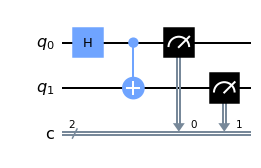

In [13]:
# Creating a Quantum Circuit with 2 Qubits (Q0, C0) and 2 Classical Registers (Q1, C1)
qc = QuantumCircuit(2,2)

# Applying Hadamard on the 0th Qubit
qc.h(0)

# CNOT Gate with the source as the 0th Qubit and the target as the 1st Qubit 
qc.cx(0,1)

# Map Q0 to C0 and Q1 to C1
qc.measure( range(2), range(2) )

qc.draw()

Counts: {'00': 486, '11': 538}


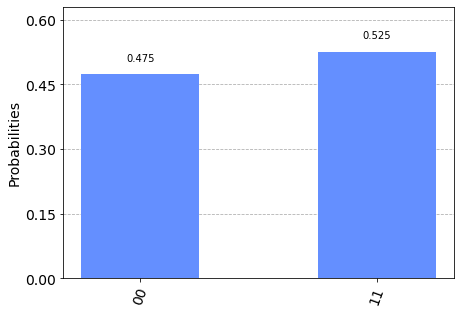

In [16]:
# Simulation (Aer is for simulations)

# Defining a backend which mentions where to run the Quantum Circuit (Using the qasm simulator for now)
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(qc, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(qc)

print("Counts:", counts)

plot_histogram(counts)

In [17]:
provider.backends() # backends available to this account

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

Counts: {'00': 464, '01': 43, '10': 56, '11': 461}


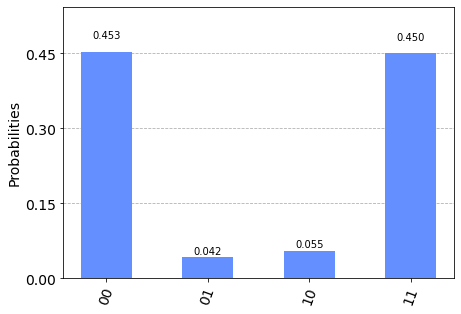

In [20]:
# Actually running it on a Quantum Computer (same code as before)

backend = provider.get_backend("ibmq_belem")
job_simulator = execute(qc, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(qc)

print("Counts:", counts)

plot_histogram(counts)